In [26]:
import numpy
import tensorflow
# first neural network with keras tutorial
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# load the dataset
dataset = loadtxt('total_data_free_edit.txt', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:31]
HL = dataset[:,31]
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(31,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, HL, epochs=500, batch_size=36, verbose=0)
# evaluate the keras model
scores = model.evaluate(X, HL, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
# save model and architecture to single file
model.save("model_free.h5")
print("Saved model to disk")


KeyboardInterrupt: 

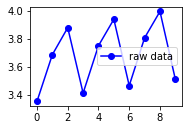

In [ ]:
from numpy import loadtxt
import matplotlib.pyplot as plt
# load the dataset
dataset = loadtxt('total_data_metal_V2.txt', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:31]
HL = dataset[:,31]
n = list(range(len(HL)))
i = range(10)
plt.subplot(222)
plt.plot(i, HL[:10], color='blue', marker='o', label='raw data')
plt.legend()
plt.show()


In [ ]:
import numpy as np
def trunc(values, decs=0):
    return np.trunc(values*10**decs)/(10**decs)

from numpy import loadtxt
# load the dataset
dataset = loadtxt('total_data_free_edit.txt', delimiter=',')
# split into input (X) and output (y) variables
X = dataset[:,0:31]
HL = trunc(dataset[:,31], decs=2) 

arr_x = []
for e in X:
    for i in e:
        arr_x.append(round(i,2))
arr_x[2]

4456.0

In [5]:
import numpy as np
from numpy import loadtxt
import tensorflow_decision_forests as tfdf

# load the dataset
dataset = loadtxt('Ni_Zn_V4.txt', delimiter=',')
# split into input (X) and output (y) variables
features = dataset[:,0:28]
# Labels are the values we want to predict
labels = dataset[:,30]

# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels)

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
#print(predictions,test_labels)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
#print(errors)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'eV.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Training Features Shape: (324, 28)
Training Labels Shape: (324,)
Testing Features Shape: (108, 28)
Testing Labels Shape: (108,)
Mean Absolute Error: 0.04 eV.
Accuracy: 94.61 %.


In [ ]:
# Specify the model.
model_1 = tfdf.keras.RandomForestModel()

# Train the model.
model_1.fit(train_features, train_labels)

model_1.compile(metrics=["accuracy"])
evaluation = model_1.evaluate(test_features, test_labels, return_dict=True)
print()

# make class predictions with the model
#predictions = (model_1.predict(labels))
# summarize the first 5 cases


Use /tmp/tmpcmlgjoks as temporary training directory
Reading training dataset...


Training dataset read in 0:00:00.259766. Found 486 examples.
Training model...
Model trained in 0:00:00.049310
Compiling model...


[INFO kernel.cc:1176] Loading model from path /tmp/tmpcmlgjoks/model/ with prefix 164648aa2916422f
[INFO abstract_model.cc:1248] Engine "RandomForestOptPred" built
[INFO kernel.cc:1022] Use fast generic engine


Model compiled.


6/6 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00



In [ ]:
# load and evaluate a saved model
from numpy import loadtxt
from tensorflow.keras.models import load_model

# load model
model = load_model('model_free.h5')
# summarize model.
model.summary()
# load dataset
dataset = loadtxt("total_data_free_V2.txt", delimiter=",")
# split into input (X) and output (Y) variables
x = dataset[:,0:31]
HL = dataset[:,31]
# evaluate the model
score = model.evaluate(x, HL, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], score[1]*100))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 40)                1280      
                                                                 
 dense_1 (Dense)             (None, 31)                1271      
                                                                 
 dense_2 (Dense)             (None, 31)                992       
                                                                 
 dense_3 (Dense)             (None, 31)                992       
                                                                 
 dense_4 (Dense)             (None, 15)                480       
                                                                 
 dense_5 (Dense)             (None, 1)                 16        
                                                                 
Total params: 5,031
Trainable params: 5,031
Non-trainabl

In [ ]:
import numpy as np
print('linker 2-4', np.array([666.23, 242, 52, 4, 8, 8, 4, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 0, 0, 0, 0, 0, 4, 2])- np.array([642.23, 234, 50, 4, 8, 8, 4, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 0, 0, 0, 0, 0, 2, 2]))
print('linker 4-6', np.array([690.23, 250, 54, 4, 8, 8, 4, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 0, 0, 0, 0, 0, 6, 2])-np.array([666.23, 242, 52, 4, 8, 8, 4, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 0, 0, 0, 0, 0, 4, 2]))

print('unit 2-3', np.array([974.33, 354, 76, 6, 12, 12, 6, 12, 0, 0, 0, 0, 0, 0, 0, 6, 6, 0, 12, 0, 0, 0, 0, 0, 0, 2, 3])-np.array([642.23, 234, 50, 4, 8, 8, 4, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 0, 0, 0, 0, 0, 2, 2]))
print('unit 2-4', np.array([1306.44, 474, 102, 8, 16, 16, 8, 16, 0, 0, 0, 0, 0, 0, 0, 8, 8, 0, 16, 0, 0, 0, 0, 0, 0, 2, 4])-np.array([642.23, 234, 50, 4, 8, 8, 4, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 0, 0, 0, 0, 0, 2, 2]))

linker 2-4 [24.  8.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  2.  0.]
linker 4-6 [24.  8.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  2.  0.]
unit 2-3 [332.1 120.   26.    2.    4.    4.    2.    4.    0.    0.    0.    0.
   0.    0.    0.    2.    2.    0.    4.    0.    0.    0.    0.    0.
   0.    0.    1. ]
unit 2-4 [664.21 240.    52.     4.     8.     8.     4.     8.     0.     0.
   0.     0.     0.     0.     0.     4.     4.     0.     8.     0.
   0.     0.     0.     0.     0.     0.     2.  ]


In [55]:
l = np.array([3947.08, 1410, 312, 20, 40, 40, 20, 40, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 40, 0, 0, 0, 0, 0, 0, 8, 10]) + np.array([332.1, 120, 26, 2, 4, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1])*30
np.around([1.391008e+04, 5.010000e+03, 1.092000e+03, 8.000000e+01,
        1.600000e+02, 1.600000e+02, 8.000000e+01, 1.600000e+02,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 8.000000e+01,
        8.000000e+01, 0.000000e+00, 1.600000e+02, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,],4)

array([13910.08,  5010.  ,  1092.  ,    80.  ,   160.  ,   160.  ,
          80.  ,   160.  ,     0.  ,     0.  ,     0.  ,     0.  ,
           0.  ,     0.  ,     0.  ,    80.  ,    80.  ,     0.  ,
         160.  ,     0.  ,     0.  ,     0.  ,     0.  ,     0.  ])

In [50]:
# H_C10_2
print(np.array([714.23, 258, 56, 4, 8, 8, 4, 8, 0, 0, 0, 0, 0, 0, 0, 4, 4, 0, 8, 0, 0, 0, 0, 0, 0, 8, 2]) + np.array([24, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0]))
# H_C8_12
print(np.array([3947.08, 1410, 312, 20, 40, 40, 20, 40, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 40, 0, 0, 0, 0, 0, 0, 8, 10]) + np.array([332.1, 120, 26, 2, 4, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1])*2)
# H_C8_20
print(np.array([3947.08, 1410, 312, 20, 40, 40, 20, 40, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 40, 0, 0, 0, 0, 0, 0, 8, 10]) + np.array([332.1, 120, 26, 2, 4, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1])*10)
# H_C8_30
print(np.array([3947.08, 1410, 312, 20, 40, 40, 20, 40, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 40, 0, 0, 0, 0, 0, 0, 8, 10]) + np.array([332.1, 120, 26, 2, 4, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1])*20)
# H_C8_40
print(np.array([3947.08, 1410, 312, 20, 40, 40, 20, 40, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 40, 0, 0, 0, 0, 0, 0, 8, 10]) + np.array([332.1, 120, 26, 2, 4, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1])*30)
# H_C8_50
print(np.array([3947.08, 1410, 312, 20, 40, 40, 20, 40, 0, 0, 0, 0, 0, 0, 0, 20, 20, 0, 40, 0, 0, 0, 0, 0, 0, 8, 10]) + np.array([332.1, 120, 26, 2, 4, 4, 2, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 4, 0, 0, 0, 0, 0, 0, 0, 1])*40)

[738.23 266.    58.     4.     8.     8.     4.     8.     0.     0.
   0.     0.     0.     0.     0.     4.     4.     0.     8.     0.
   0.     0.     0.     0.     0.    10.     2.  ]
[4611.28 1650.    364.     24.     48.     48.     24.     48.      0.
    0.      0.      0.      0.      0.      0.     24.     24.      0.
   48.      0.      0.      0.      0.      0.      0.      8.     12.  ]
[7268.08 2610.    572.     40.     80.     80.     40.     80.      0.
    0.      0.      0.      0.      0.      0.     40.     40.      0.
   80.      0.      0.      0.      0.      0.      0.      8.     20.  ]
[1.058908e+04 3.810000e+03 8.320000e+02 6.000000e+01 1.200000e+02
 1.200000e+02 6.000000e+01 1.200000e+02 0.000000e+00 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 6.000000e+01 6.000000e+01 0.000000e+00 1.200000e+02 0.000000e+00
 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
 8.000000e+00 3.000000e+01]
[1.391008e+04 5.01000

In [30]:
# metal
import numpy as np
print('linker 2-4', np.array([774.067, 254, 54, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 2, 0, 0, 0, 0, 0, 0, 26, 4, 2])- np.array([750.067, 246, 52, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 2, 2]))
print('linker 4-6', np.array([798.067, 262, 56, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 4, 0, 0, 0, 0, 0, 0, 26, 6, 2])-np.array([774.067, 254, 54, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 2, 0, 0, 0, 0, 0, 0, 26, 4, 2]))

print('Fe unit 2-3', np.array([1136.092, 372, 79, 0, 12, 12, 0, 15, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 4, 0, 0, 0, 0, 0, 0, 26, 2, 3])-np.array([750.067, 246, 52, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 2, 2]))
print('Fe unit 2-4', np.array([1522.118, 498, 106, 0, 16, 16, 0, 20, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 4, 0, 0, 0, 0, 0, 0, 26, 2, 4])-np.array([750.067, 246, 52, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 2, 2]))

print('Ni unit 2-3', np.array([1142.093, 378, 79, 0, 12, 12, 0, 15, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 4, 0, 0, 0, 0, 0, 0, 28, 2, 3])-np.array([754.067, 250, 52, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28, 2, 2]))
print('Ni unit 3-4', np.array([1530.119, 506, 106, 0, 16, 16, 0, 20, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 8, 0, 0, 0, 0, 0, 0, 28, 2, 4]) - np.array([1142.093, 378, 79, 0, 12, 12, 0, 15, 0, 0, 0, 0, 0, 0, 0, 12, 0, 0, 4, 0, 0, 0, 0, 0, 0, 28, 2, 3]))

linker 2-4 [24.  8.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  2.  0.]
linker 4-6 [24.  8.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  2.  0.  0.  0.  0.  0.  0.  0.  2.  0.]
Fe unit 2-3 [386.025 126.     27.      0.      4.      4.      0.      5.      0.
   0.      0.      0.      0.      0.      0.      4.      0.      0.
   4.      0.      0.      0.      0.      0.      0.      0.      0.
   1.   ]
Fe unit 2-4 [772.051 252.     54.      0.      8.      8.      0.     10.      0.
   0.      0.      0.      0.      0.      0.      8.      0.      0.
   4.      0.      0.      0.      0.      0.      0.      0.      0.
   2.   ]
Ni unit 2-3 [388.026 128.     27.      0.      4.      4.      0.      5.      0.
   0.      0.      0.      0.      0.      0.      4.      0.      0.
   4.      0.      0.      0.      0.      0.      0.      0.      0.
   1.   ]
Ni unit 3-4 [388.026 128.     27.      0.      4.   

In [35]:
# Ni_H_C10_2
print(np.array([826.067, 274, 58, 0, 8, 8, 0, 10, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 4, 0, 0, 0, 0, 0, 0, 28, 8, 2]) + np.array([24, 8, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0]))
# Ni_H_C8_6
print(np.array([1746.119, 578, 124, 0, 16, 16, 0, 20, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 8, 0, 0, 0, 0, 0, 0, 28, 8, 4]) + np.array([388.026, 128, 27, 0, 4, 4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1])*2)
# Ni_H_C8_10
print(np.array([1746.119, 578, 124, 0, 16, 16, 0, 20, 0, 0, 0, 0, 0, 0, 0, 16, 0, 0, 8, 0, 0, 0, 0, 0, 0, 28, 8, 4]) + np.array([388.026, 128, 27, 0, 4, 4, 0, 5, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 1])*4)

[850.067 282.     60.      0.      8.      8.      0.     10.      0.
   0.      0.      0.      0.      0.      0.      8.      0.      0.
   6.      0.      0.      0.      0.      0.      0.     28.     10.
   2.   ]
[2522.171  834.     178.       0.      24.      24.       0.      30.
    0.       0.       0.       0.       0.       0.       0.      24.
    0.       0.      16.       0.       0.       0.       0.       0.
    0.      28.       8.       6.   ]
[3298.223 1090.     232.       0.      32.      32.       0.      40.
    0.       0.       0.       0.       0.       0.       0.      32.
    0.       0.      24.       0.       0.       0.       0.       0.
    0.      28.       8.       8.   ]


In [25]:
# first neural network with keras tutorial
import tensorflow as tf
from numpy import loadtxt
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# load model
model = load_model('model_free_2.h5')

#dataset2 = loadtxt('total_data_TPP.txt', delimiter=',')
# new instance where we do not know the answer
Xnew = np.array([[738.23,266,58,4,8,8,4,8,0,0,0,0,0,0,0,4,4,0,8,0,0,0,0,0,0,10,2],[4279.18,1530,338,22,44,44,22,44,0,0,0,0,0,0,0,22,22,0,44,0,0,0,0,0,0,8,11]])
# make a prediction
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew.tolist(), ynew))


1/1 [==============================] - 0s 42ms/step
X=[[738.23, 266.0, 58.0, 4.0, 8.0, 8.0, 4.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.0, 4.0, 0.0, 8.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.0, 2.0], [4279.18, 1530.0, 338.0, 22.0, 44.0, 44.0, 22.0, 44.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 22.0, 22.0, 0.0, 44.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 11.0]], Predicted=[[1.1215177]
 [0.6457527]]


In [45]:
# first neural network with keras tutorial
import tensorflow as tf
from numpy import loadtxt
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model

# load model
model = load_model('model_metal.h5')

#dataset2 = loadtxt('total_data_TPP.txt', delimiter=',')
# new instance where we do not know the answer
Xnew = np.array([[850.067,282,60,0,8,8,0,10,0,0,0,0,0,0,0,8,0,0,6,0,0,0,0,0,0,28,10,2],[2522.171,834,178,0,24,24,0,30,0,0,0,0,0,0,0,24,0,0,16,0,0,0,0,0,0,28,8,6],[3298.223,1090,232,0,32,32,0,40,0,0,0,0,0,0,0,32,0,0,24,0,0,0,0,0,0,28,8,8]])
# make a prediction
# make a prediction
ynew = model.predict(Xnew)
# show the inputs and predicted outputs
print("X=%s, Predicted=%s" % (Xnew.tolist(), ynew))

1/1 [==============================] - 0s 41ms/step
X=[[850.067, 282.0, 60.0, 0.0, 8.0, 8.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 0.0, 0.0, 6.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 10.0, 2.0], [2522.171, 834.0, 178.0, 0.0, 24.0, 24.0, 0.0, 30.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 24.0, 0.0, 0.0, 16.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 8.0, 6.0], [3298.223, 1090.0, 232.0, 0.0, 32.0, 32.0, 0.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 32.0, 0.0, 0.0, 24.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 28.0, 8.0, 8.0]], Predicted=[[1.2083652 ]
 [0.9056128 ]
 [0.81442356]]


In [56]:
i = range(19)
i+1

TypeError: unsupported operand type(s) for +: 'range' and 'int'